<a href="https://colab.research.google.com/github/rohansaini27/Data_Analytics-Using-ML/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Load your dataset
data = pd.read_csv('/content/dataset.csv')

In [ ]:
# 1. Extract information from the dataset
print("Number of instances:", data.shape[0])
print("Number of features:", data.shape[1] - 1)  # assuming last column is the label
print("Instances per class:\n", data['classification'].value_counts())

In [ ]:
# 2. Handle non-numeric data and split the dataset into two parts (training and testing)
X = data.drop('classification', axis=1)
y = data['classification']

In [ ]:
# Automatically encode all categorical variables
ct = ColumnTransformer(
    [('ohe', OneHotEncoder(), X.select_dtypes(include=['object']).columns)],
    remainder='passthrough')
X_encoded = ct.fit_transform(X)

In [ ]:
# Encode the target variable if it's categorical
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)


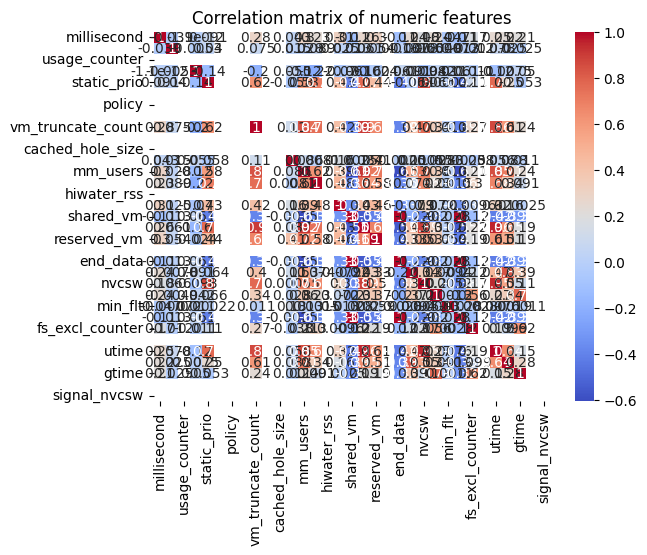

In [ ]:
# 3. EDA on the dataset
# Exclude non-numeric columns for correlation computation
numeric_cols = X.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation matrix of numeric features")
plt.show()


In [ ]:
# Bar plot of categorical features (first 5 features)
categorical_features = data.select_dtypes(include=['object']).columns[:5]
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature)
    plt.title(f'Frequency of {feature}')
    plt.xticks(rotation=45)
    plt.show()

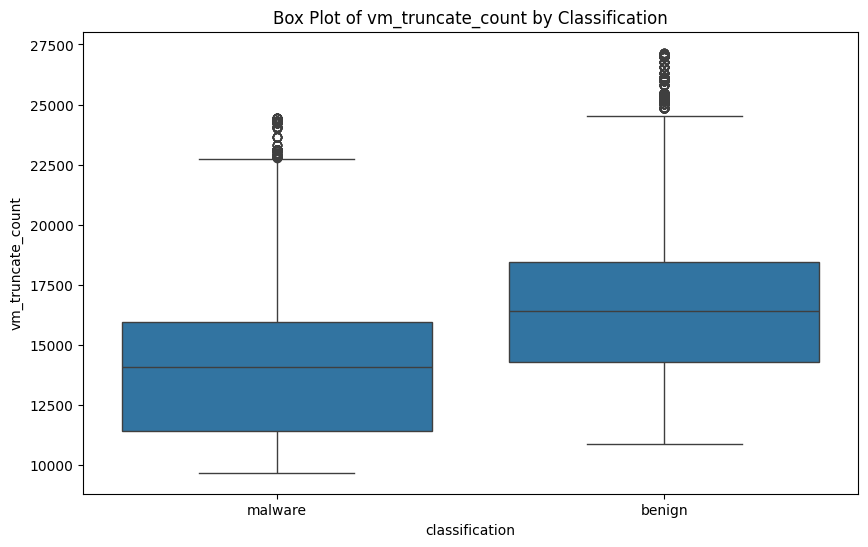

In [ ]:
# Box plot (only one plot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='classification', y='vm_truncate_count')
plt.title('Box Plot of vm_truncate_count by Classification')
plt.show()

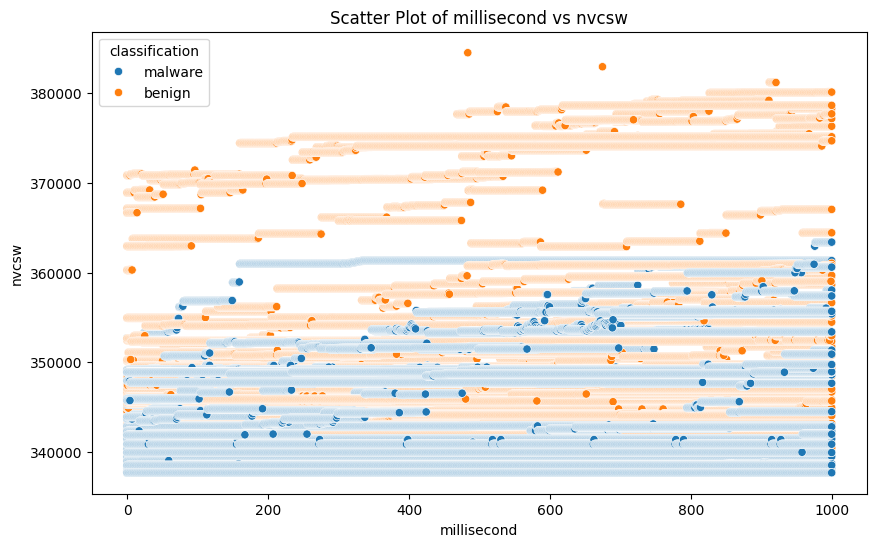

In [ ]:
# Scatter plot (only one plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='millisecond', y='nvcsw', hue='classification')
plt.title('Scatter Plot of millisecond vs nvcsw')
plt.show()

In [ ]:
# 4. Create 3 different machine learning classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel='linear')
}

In [ ]:
# 5. Train the three classifiers
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

In [ ]:
# 6. Test the classifiers and generate confusion matrices
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {name}')
    plt.show()